In [1]:
#Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.calibration import calibration_curve

In [10]:
#Setting the training dataset
df1=pd.read_csv("D:/TCC/3013_Litho_Train.csv", sep=";")

Train_3013 = df1.copy()


Train_3013.head()
print("\nDimensões do Banco de Dados:\n{0}\n".format(df1.shape))
print("\nCampos do Banco de Dados:\n{0}\n".format(list(df1.keys())))
print("\nTipos dos dados:\n{0}\n".format(df1.dtypes))

#Updating the columns of the radioelements and creation of Lateritic Index
columns_to_update2 = ['KPERC','eU','eTH']
Train_3013[columns_to_update2] = Train_3013[columns_to_update2].map(lambda x: 0.0001 if x<0 else x)
Train_3013['INDICELATE'] = np.arctan((Train_3013['eU']/ Train_3013['KPERC']) * (Train_3013['eTH'] /Train_3013['KPERC']))
print(Train_3013.head())

#New CSV file processed
csv_file_path = 'D:/TCC/3013_Litho_Train_Proc.csv'
Train_3013.to_csv(csv_file_path, index=False)


Dimensões do Banco de Dados:
(24445, 16)


Campos do Banco de Dados:
['FID', 'ASA', 'CTEXP', 'eTH', 'eU', 'KPERC', 'MAGIGRF', 'MDT', 'ThetaMap', 'THKRAZAO', 'UKRAZAO', 'UTHRAZAO', 'X', 'Y', 'Cod_Litho', 'Geologia_R']


Tipos dos dados:
FID             int64
ASA           float64
CTEXP         float64
eTH           float64
eU            float64
KPERC         float64
MAGIGRF       float64
MDT           float64
ThetaMap      float64
THKRAZAO      float64
UKRAZAO       float64
UTHRAZAO      float64
X             float64
Y             float64
Cod_Litho       int64
Geologia_R     object
dtype: object

     FID       ASA    CTEXP      eTH      eU   KPERC  MAGIGRF       MDT  \
0  33000  1.391664  14.5686  33.2842  4.6322  1.3226  -44.040  1017.668   
1  33001  1.418129  14.6224  33.5233  4.6803  1.2919  -30.078  1018.322   
2  33002  1.444594  14.6762  33.7624  4.7284  1.2612  -15.955  1018.976   
3  33003  1.486182  14.7300  34.0015  4.7765  1.2305    5.216  1019.630   
4  33004  1.497524  1

In [8]:
fields = list(Train_3013.columns)
data_types = Train_3013.dtypes.astype(str)

# Creating an executive Summary
summary_df = pd.DataFrame({
    'Campo do Banco de Dados': fields,
    'Tipo de Dados': data_types,
})


for index, row in summary_df.iterrows():
    print("{:<20} {:<20}".format(row['Campo do Banco de Dados'], row['Tipo de Dados']))

FID                  int64               
ASA                  float64             
CTEXP                float64             
eTH                  float64             
eU                   float64             
KPERC                float64             
MAGIGRF              float64             
MDT                  float64             
ThetaMap             float64             
THKRAZAO             float64             
UKRAZAO              float64             
UTHRAZAO             float64             
X                    float64             
Y                    float64             
Cod_Litho            int64               
Geologia_R           object              
INDICELATE           float64             


In [13]:
#Setting the test dataset
df=pd.read_csv("D:/TCC/3013_Litho_Test.csv", sep=";")
Test_3013 = df.copy()


Test_3013.head()

#Updating the columns of the radioelements and creation of Lateritic Index
columns_to_update = ['KPERC','eU','eTH']
Test_3013[columns_to_update] = Test_3013[columns_to_update].map(lambda x: 0.0001 if x<0 else x)
Test_3013['INDICELATE'] = np.arctan((Test_3013['eU']/ Test_3013['KPERC']) * (Test_3013['eTH'] /Test_3013['KPERC']))
print(Test_3013.head())

#New CSV file processed
csv_file_path = 'D:/TCC/3013_Litho_Test_Proc.csv'
Test_3013.to_csv(csv_file_path, index=False)

   FID       ASA   CTEXP      eTH      eU   KPERC  MAGIGRF      MDT  ThetaMap  \
0    0  0.006685  5.7220  11.7470  1.0710  1.0970   34.498  976.020  0.281671   
1    1  0.006665  5.6008  11.4764  1.0563  1.0745   34.390  976.726  0.348877   
2    2  0.006671  5.4796  11.2058  1.0416  1.0520   34.349  977.432  0.370654   
3    3  0.006664  5.3584  10.9352  1.0269  1.0295   34.308  978.138  0.391241   
4    4  0.006644  5.2372  10.6646  1.0122  1.0070   34.210  978.844  0.443395   

   THKRAZAO  UKRAZAO  UTHRAZAO         X          Y  Cod_Litho Geologia_R  \
0    9.3670   0.8980    0.0960  319973.0  7938016.0        NaN              
1    9.3756   0.8914    0.0952  319973.3  7938023.4        NaN              
2    9.3842   0.8848    0.0944  319973.6  7938030.8        NaN              
3    9.3928   0.8782    0.0936  319973.9  7938038.2        NaN              
4    9.4014   0.8716    0.0928  319974.2  7938045.6        NaN              

   INDICELATE  
0    1.475434  
1    1.475843  
2 

In [16]:
df_train=pd.read_csv("D:/TCC/3013_Litho_Train_Proc.csv", sep=",")
df_train.head()
print("\nDimensões do Banco de Dados:\n{0}\n".format(df_train.shape))
print("\nCampos do Banco de Dados:\n{0}\n".format(list(df_train.keys())))
print("\nTipos dos dados:\n{0}\n".format(df_train.dtypes))


Dimensões do Banco de Dados:
(24445, 17)


Campos do Banco de Dados:
['FID', 'ASA', 'CTEXP', 'eTH', 'eU', 'KPERC', 'MAGIGRF', 'MDT', 'ThetaMap', 'THKRAZAO', 'UKRAZAO', 'UTHRAZAO', 'X', 'Y', 'Cod_Litho', 'Geologia_R', 'INDICELATE']


Tipos dos dados:
FID             int64
ASA           float64
CTEXP         float64
eTH           float64
eU            float64
KPERC         float64
MAGIGRF       float64
MDT           float64
ThetaMap      float64
THKRAZAO      float64
UKRAZAO       float64
UTHRAZAO      float64
X             float64
Y             float64
Cod_Litho       int64
Geologia_R     object
INDICELATE    float64
dtype: object



In [ ]:
#Generating the Covariance and Correlation Matrices
columns_to_select = ['MDT', 'ASA', 'ThetaMap', 'KPERC', 'eTH', 'eU', 'THKRAZAO', 'UKRAZAO', 'UTHRAZAO','INDICELATE']
Variaveis = Train_3013[columns_to_select]

covariance_matrix = Variaveis.cov()
correlation_matrix = Variaveis.corr()

# Print Matrices
print("Covariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

In [ ]:
#Generating the Covariance and Correlation Matrices
columns_to_select = ['MDT', 'ASA', 'ThetaMap', 'KPERC', 'eTH', 'eU', 'THKRAZAO', 'UKRAZAO', 'UTHRAZAO','INDICELATE']
Variaveis = Test_3013[columns_to_select]

covariance_matrix = Variaveis.cov()
correlation_matrix = Variaveis.corr()

# Print Matrices
print("Covariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)


In [4]:
df_test=pd.read_csv("D:/TCC/3013_Litho_Test_Proc.csv", sep=";")
df_test.head()
print("\nDimensões do Banco de Dados:\n{0}\n".format(df_test.shape))
print("\nCampos do Banco de Dados:\n{0}\n".format(list(df_test.keys())))
print("\nTipos dos dados:\n{0}\n".format(df_test.dtypes))


Dimensões do Banco de Dados:
(94386, 17)


Campos do Banco de Dados:
['FID', 'ASA', 'CTEXP', 'eTH', 'eU', 'KPERC', 'MAGIGRF', 'MDT', 'ThetaMap', 'THKRAZAO', 'UKRAZAO', 'UTHRAZAO', 'X', 'Y', 'Cod_Litho', 'Geologia_R', 'INDICELATE']


Tipos dos dados:
FID             int64
ASA           float64
CTEXP         float64
eTH           float64
eU            float64
KPERC         float64
MAGIGRF       float64
MDT           float64
ThetaMap      float64
THKRAZAO      float64
UKRAZAO       float64
UTHRAZAO      float64
X             float64
Y             float64
Cod_Litho     float64
Geologia_R     object
INDICELATE    float64
dtype: object



In [17]:
#Training the RF model
X_train = df_train[['ASA', 'eTH', 'eU','MDT','INDICELATE']]  # Replace with your actual feature names
y_train = df_train['Cod_Litho']

model = RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=10, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=10)

In [6]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and display the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.87893661 0.84294479 0.90429448 0.86134969 0.85071575 0.89279869
 0.88338789 0.89075286 0.86211129 0.8195581 ]
Mean Accuracy: 0.8686850146763998


In [7]:
#Making the  predictions
X_predict = df_test[['ASA', 'eTH', 'eU','MDT','INDICELATE']]

predictions = model.predict(X_predict)

df_test['Predicted Lithology'] = predictions


In [8]:
#Display the predictions
df_test['Cod_Litho'] = predictions
print("\nTesting Dataset with Predicted Lithology:\n")
print(df_test[['ASA', 'eTH', 'eU','MDT','INDICELATE','Cod_Litho']])


Testing Dataset with Predicted Lithology:

            ASA      eTH      eU      MDT  INDICELATE  Cod_Litho
0      0.006685  11.7470  1.0710  976.020    1.475434          4
1      0.006665  11.4764  1.0563  976.726    1.475843          4
2      0.006671  11.2058  1.0416  977.432    1.476262          4
3      0.006664  10.9352  1.0269  978.138    1.476691          4
4      0.006644  10.6646  1.0122  978.844    1.477132          4
...         ...      ...     ...      ...         ...        ...
94381  0.336814  22.7308  3.3200  855.588    1.562648          5
94382  0.330807  22.4016  3.6115  856.146    1.564265          5
94383  0.304360  22.0724  3.9030  856.704    1.565592          5
94384  0.296842  21.7432  4.1945  857.262    1.566686          5
94385  0.283309  21.4140  4.4860  857.820    1.567590          5

[94386 rows x 6 columns]


In [9]:
df_test['Cod_Litho'].value_counts()


Cod_Litho
5    45630
2    20420
3     9729
4     9605
0     5623
1     3379
Name: count, dtype: int64

In [26]:
#Calculating the probabilistic and log loss function
y_prob = df_test['Cod_Litho']

X_pred = df_test[['ASA', 'eTH', 'eU','MDT','INDICELATE']]

# Make probabilistic predictions
probabilities = model.predict_proba(X_pred)

class_names = model.classes_

threshold = 0.5

# Convert probabilities to predicted classes based on the threshold
pred1 = np.argmax(probabilities, axis=1)
predicted_probs = np.max(probabilities, axis=1)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_prob, pred1)
print(f"Accuracy: {accuracy}")

# Calculate and print the log loss (for probabilistic models)
logloss = log_loss(y_prob, probabilities, labels=class_names)
print(f"Log Loss: {logloss}")

# Optionally, you can print the predicted probabilities for further analysis
df_test['Predicted_Probabilities'] = predicted_probs
print("\nTesting Dataset with Predicted Probabilities:\n")
print(df_test[['Cod_Litho', 'Predicted_Probabilities']])


Accuracy: 1.0
Log Loss: 0.17194093232514243

Testing Dataset with Predicted Probabilities:

       Cod_Litho  Predicted_Probabilities
0              4                    0.969
1              4                    0.967
2              4                    0.969
3              4                    0.968
4              4                    0.970
...          ...                      ...
94381          5                    0.683
94382          5                    0.675
94383          5                    0.701
94384          5                    0.711
94385          5                    0.719

[94386 rows x 2 columns]


In [67]:
mean_probabilities_per_class = np.mean(predicted_probs, axis=0)

# Print or use the mean probabilities per class as needed
print("Mean Probabilities Per Class:")
print(mean_probabilities_per_class)

Mean Probabilities Per Class:
0.85833866418473


In [68]:
mean_probabilities_per_class = np.mean(probabilities, axis=0)

# Print or use the mean probabilities per class as needed
for i, mean_prob in enumerate(mean_probabilities_per_class):
    print(f"Class {i} = Mean Probability: {mean_prob}")

Class 0 = Mean Probability: 0.062115381607219224
Class 1 = Mean Probability: 0.034024209098809786
Class 2 = Mean Probability: 0.21374798642970272
Class 3 = Mean Probability: 0.1051387735921781
Class 4 = Mean Probability: 0.1044271024659439
Class 5 = Mean Probability: 0.48054654680617737


In [41]:
# Assuming 'y_prob' is the true labels
y_true = df_test['Cod_Litho']

# Assuming 'X_pred' contains the features for prediction
X_pred = df_test[['ASA', 'eTH', 'eU', 'MDT', 'INDICELATE']]

# Make probabilistic predictions
probabilities = model.predict_proba(X_pred)

class_names = model.classes_

threshold = 0.5

# Convert probabilities to predicted classes based on the threshold
pred_classes = np.argmax(probabilities, axis=1)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_true, pred_classes)
print(f"Accuracy: {accuracy}")

# Calculate and print the log loss (for probabilistic models)
logloss = log_loss(y_true, probabilities)
print(f"Log Loss: {logloss}")

# Optionally, you can print the predicted probabilities for further analysis
df_test['Predicted_Probabilities'] = np.max(probabilities, axis=1)
print("\nTesting Dataset with Predicted Probabilities:\n")
print(df_test[['Cod_Litho', 'Predicted_Probabilities']])


#'probabilities' stores the raw probabilities for each class, while "predicted_probs" stores the maximum probability for each precition. The choice between them depends on your specific analysis and what information you find most relevant
#If you are interested in the overall distribution of probabilities, you might use the raw "probabilities". If you are focusing on the most likely class for each prediction, you might use "Predicted_Probs".

Accuracy: 1.0
Log Loss: 0.17194093232514243

Testing Dataset with Predicted Probabilities:

       Cod_Litho  Predicted_Probabilities
0              4                    0.969
1              4                    0.967
2              4                    0.969
3              4                    0.968
4              4                    0.970
...          ...                      ...
94381          5                    0.683
94382          5                    0.675
94383          5                    0.701
94384          5                    0.711
94385          5                    0.719

[94386 rows x 2 columns]


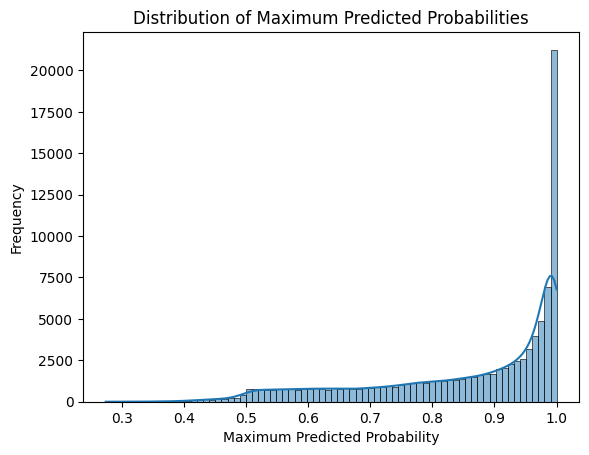

In [46]:
#Plotting Distribution of Frequency x Predicted Probability
sns.histplot(predicted_probs, kde=True)
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Predicted Probabilities')
plt.show()

In [43]:
#Reliability Diagram

from sklearn.calibration import reliability_diagram

fig, ax = plt.subplots()
reliability_diagram(ax=ax, y_true=y_true_bin.ravel(), probas_list=[predicted_probs[:, i] for i in range(n_classes)])
plt.title('Reliability Diagram')
plt.show()

ImportError: cannot import name 'reliability_diagram' from 'sklearn.calibration' (c:\Users\Geologia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\calibration.py)

In [71]:
#Saving into a New CSV to interpoplate
file_predictions_csv = pd.DataFrame(
    {
        'FID': df_test["FID"],
        'ASA': df_test["ASA"],
        'CTEXP': df_test["CTEXP"],
        'eTH': df_test["eTH"],
        'eU': df_test["eU"],
        'KPERC': df_test["KPERC"],
        'MAGIGRF':df_test['MAGIGRF'],              
        'MDT': df_test["MDT"],
        'ThetaMap': df_test["ThetaMap"],
        'THKRAZAO': df_test["THKRAZAO"],
        'UKRAZAO': df_test["UKRAZAO"],
        'UTHRAZAO': df_test["UTHRAZAO"],
        'X': df_test["X"],
        'Y': df_test["Y"],
        'Cod_Litho': predictions,
        'INDICELATE': df_test["INDICELATE"],
        'Predicted Probabilities':df_test['Predicted_Probabilities']
    }
)

csv_file_path = 'D:/TCC/3013_Litho_Test_Pred.csv'
file_predictions_csv.to_csv(csv_file_path, index=False)